### MATH 3375 Project 8 - Probability Models and Simulation  

The scenario for this project is the cost of maintaining the lighting in a large industrial facility where electronic components are manufactured. The production area is a large open space lit by 1900 industrial sized fluorescent bulbs with identical specifications (size, lumens, etc.)  Because the production area has just been constructed, all the bulbs are new.

The data files below are based on data collected on the same type of fluorescent bulbs at a similar plant. The files are:
* failures.csv - this gives the age **_in years_** of each bulb at the time it stopped working
* replacement_cost.csv - this gives the costs in recent history of replacing a single bulb

Each file has 5000 records.


In [1]:
failures <- read.csv("failures.csv")
head(failures)

,age
,<dbl>
1,10.281964
2,10.788115
3,10.834839
4,9.130032
5,10.467756
6,9.597252


In [2]:
replacement <- read.csv("replacement_costs.csv")
head(replacement)

,cost
,<dbl>
1,66.55
2,72.22
3,65.14
4,70.95
5,68.83
6,65.98


## Tasks

### 1. Determine an appropriate distribution for time to failure

The 'age' variable represents the time in years before a bulb fails (time to failure). 

You may assume that there is some Weibull distribution that reasonably represents the time to failure (in years). Your job is to determine the parameters (shape and scale) that produce a Weibull distribution that best fits the 'age' data. 

Your solution should include:
* A histogram of the data
* Q-Q plots demonstrating the data against your best-fitting distribution 
* Q-Q plots demonstrating the data against at least one other distribution that was close, but not as good as the one you chose

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: MASS

Loading required package: survival



Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters : 
      estimate  Std. Error
shape 17.07700 0.188437287
scale 10.99743 0.009590096
Loglikelihood:  -5517.204   AIC:  11038.41   BIC:  11051.44 
Correlation matrix:
          shape     scale
shape 1.0000000 0.3130833
scale 0.3130833 1.0000000


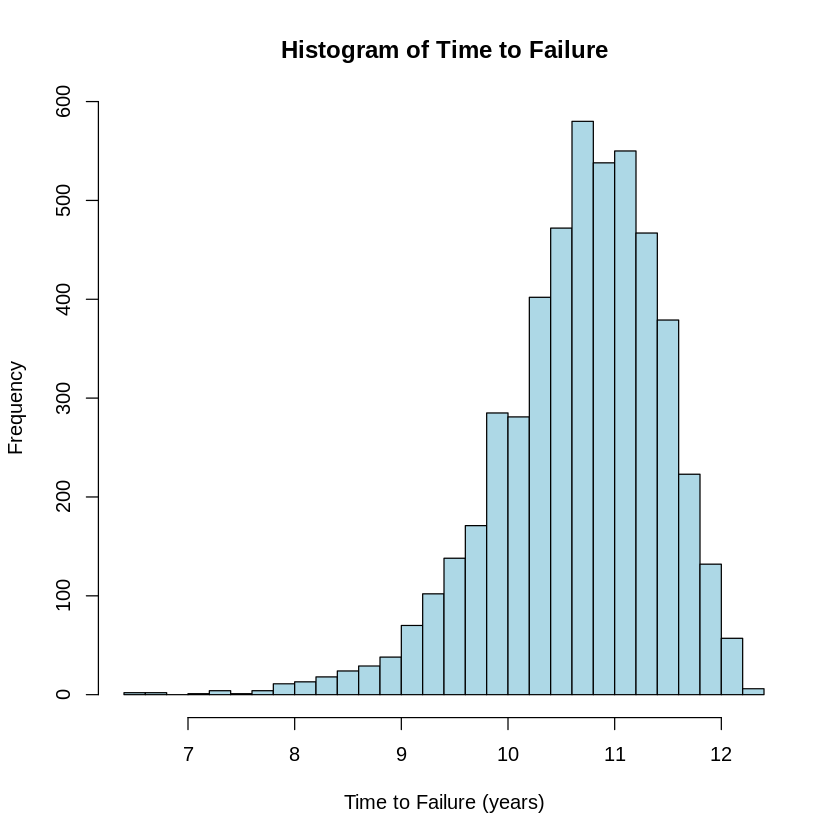

Fitting of the distribution ' exp ' by maximum likelihood 
Parameters : 
       estimate  Std. Error
rate 0.09379879 0.001326364
Loglikelihood:  -16833.02   AIC:  33668.03   BIC:  33674.55 

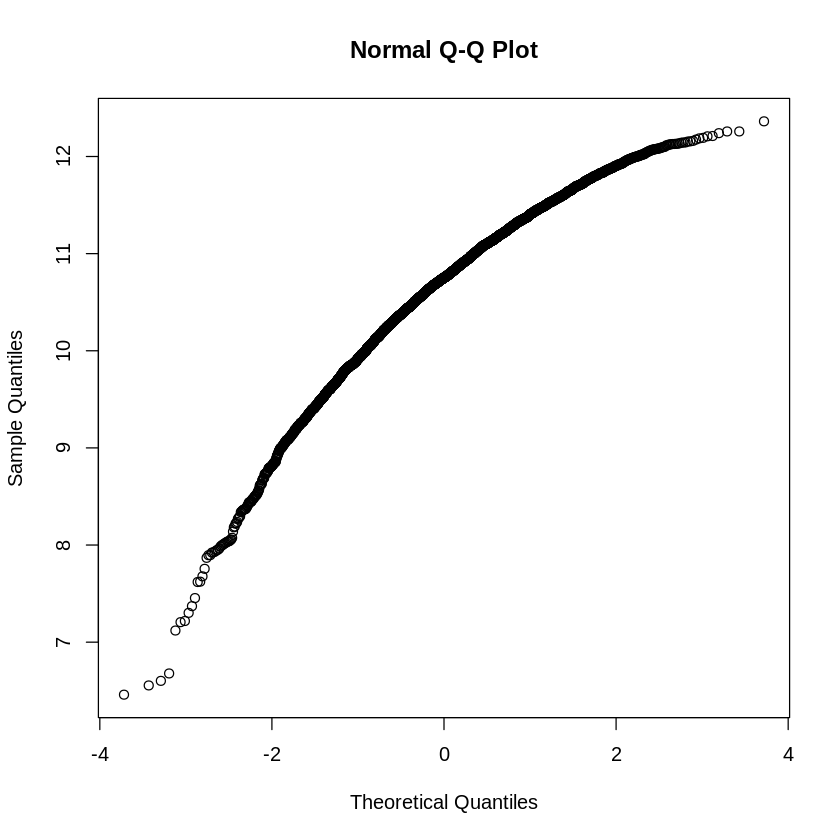

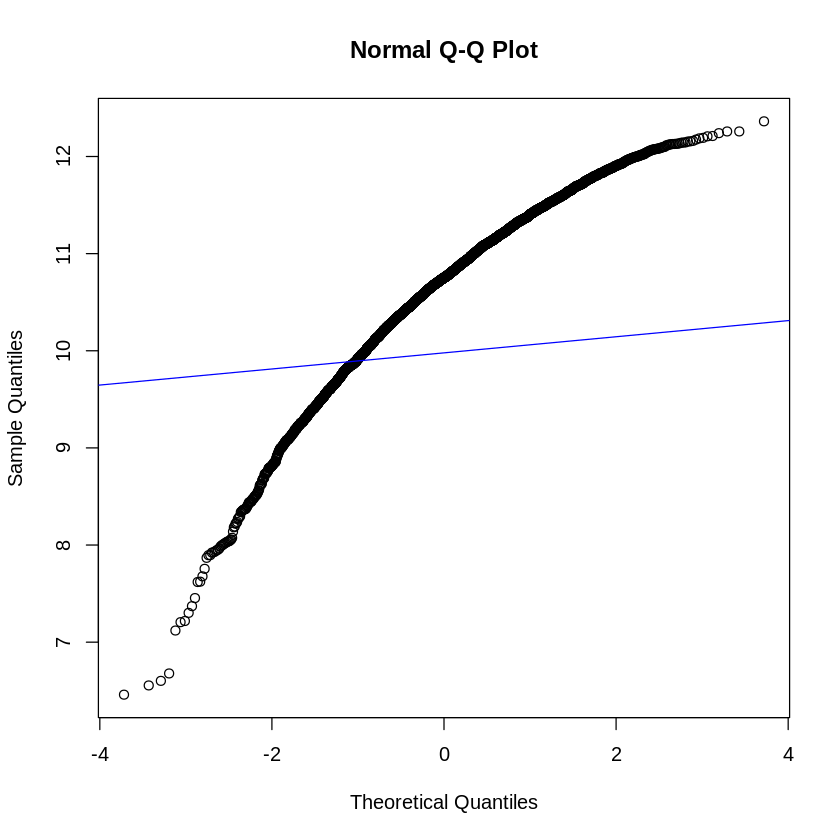

In [3]:
#Put code for Exercise 1 in this cell. You may add additional cells if you like.

#install.packages("fitdistrplus")
library(fitdistrplus)

failures <- read.csv("failures.csv")

# histogram
hist(failures$age, breaks = 30, main = "Histogram of Time to Failure", xlab = "Time to Failure (years)", col = "lightblue", border = "black")

# distribution
fit_weibull <- fitdist(failures$age, "weibull")
summary(fit_weibull)

# Q-Q plot
qqnorm(failures$age)
qqline(failures$age, distribution = function(p) qweibull(p, shape = fit_weibull$estimate[1], scale = fit_weibull$estimate[2]), col = "red")

#distribution 
fit_exp <- fitdist(failures$age, "exp")
summary(fit_exp)

# Q-Q plot
qqnorm(failures$age)
qqline(failures$age, distribution = function(p) qexp(p, rate = fit_exp$estimate[1]), col = "blue")


#### 1a. Summarize your results

Write answers in this cell.

* Describe your process for selecting the _time to failure_ distribution with the 'best fit' for the data.

a histogram was created to help visualize the distribution shape and characteristics. then the weibull and exponential were fitted to the data. the fitted models were compared. Q-Q plots were created to visualize how each distrubution aligned with the data.

* What distribution did you select as the best fit for the data? (Specify shape and scale parameters)

the shape parameters: 17.077 and scale parameter: 10.997

### 2. Determine an appropriate distribution for replacement cost

The 'cost' variable represents instances of the cost to replace a bulb. Find a distribution with an appropriate **_shape_** and determine the specific distribution parameters for it.

Your solution should include:
* A histogram of the data
* Q-Q plots demonstrating the data against your best-fitting distribution 
* Q-Q plots demonstrating the data against at least one other distribution that was close, but not as good as the one you chose

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
        estimate Std. Error
shape 1012.89277 20.2589862
rate    14.90453  0.2981809
Loglikelihood:  -10886.06   AIC:  21776.13   BIC:  21789.16 
Correlation matrix:
          shape      rate
shape 1.0000000 0.9997533
rate  0.9997533 1.0000000


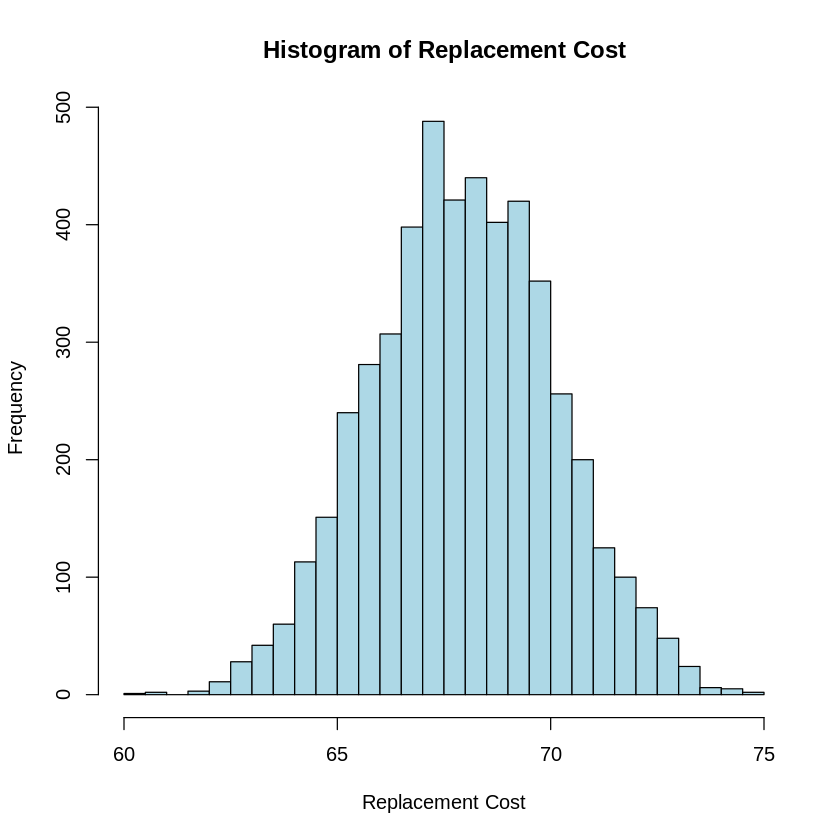

Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters : 
          estimate   Std. Error
meanlog 4.21840932 0.0004445795
sdlog   0.03143652 0.0003129349
Loglikelihood:  -10887.81   AIC:  21779.63   BIC:  21792.66 
Correlation matrix:
        meanlog sdlog
meanlog       1     0
sdlog         0     1


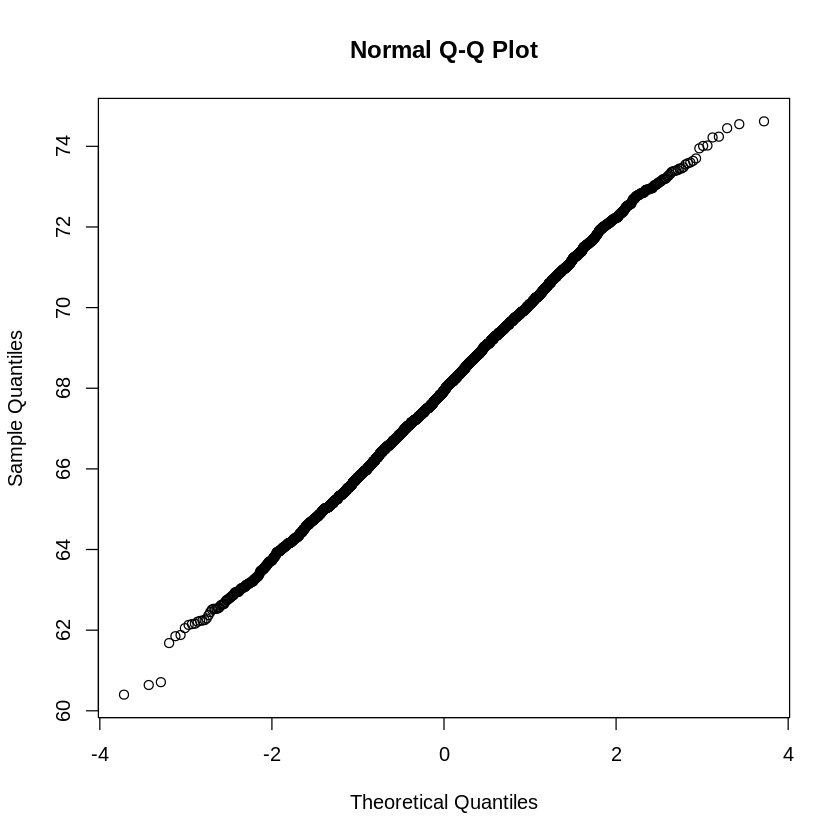

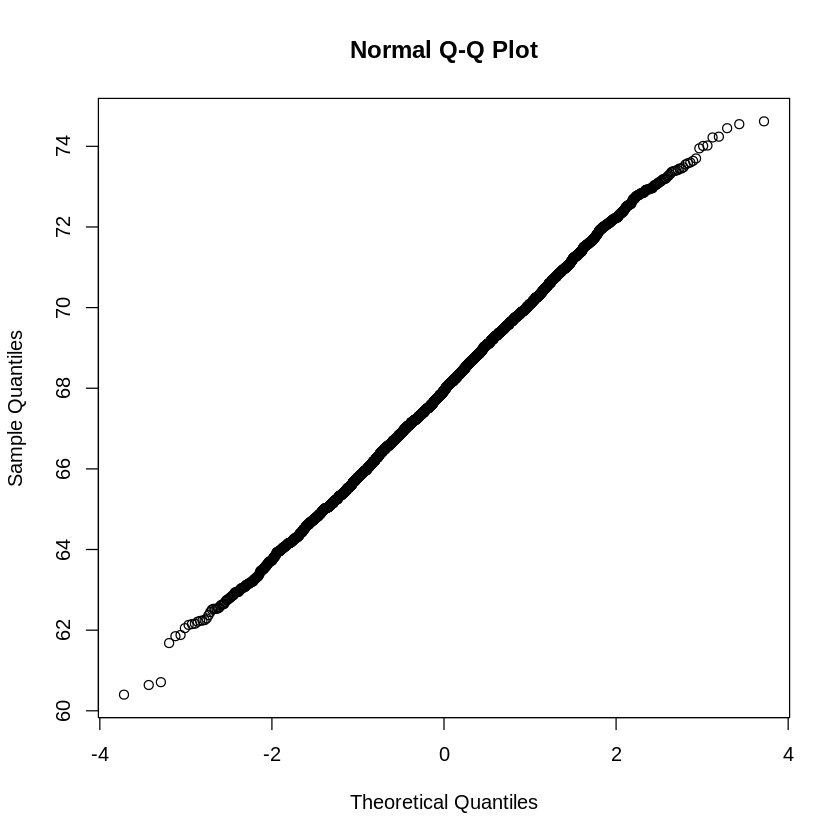

In [4]:
#Put code for Exercise 2 in this cell. You may add additional cells if you like.


replacement <- read.csv("replacement_costs.csv")

# histogram
hist(replacement$cost, breaks = 30, main = "Histogram of Replacement Cost", xlab = "Replacement Cost", col = "lightblue", border = "black")

# distribution 
fit_gamma <- fitdist(replacement$cost, "gamma")
summary(fit_gamma)

# Q-Q plot
qqnorm(replacement$cost)
qqline(replacement$cost, distribution = function(p) qgamma(p, shape = fit_gamma$estimate[1], scale = fit_gamma$estimate[2]), col = "red")

# distribution
fit_lognormal <- fitdist(replacement$cost, "lnorm")
summary(fit_lognormal)

# Q-Q plot
qqnorm(replacement$cost)
qqline(replacement$cost, distribution = function(p) qlnorm(p, meanlog = fit_lognormal$estimate[1], sdlog = fit_lognormal$estimate[2]), col = "blue")



#### 2a. Summarize your results

Write answers in this cell.

* Describe your process for selecting the _replacement cost_ distribution with the 'best fit' for the data.

created a histogram of the replacement cost data to help visualize the characteristics and shapes. the distributions were fitted to the cost data maximum estimate. then the fitted models were compared. the Q-Q plots were created to visualize each distribution.

* What distribution did you select as the best fit for the data? (Specify all parameters)
shape parameter: 1012.89277 and rate parameter is 14.90453

###  3. Conduct a single simulation for initial 10-year period

We want to simulate how many bulbs might fail within the first 10 years, and the total cost of replacing them.

You should notice in your sample 'age' data that the distribution of time to failure suggests that in a 10-year period, no one bulb should need to be replaced twice (no bulb in our sample data had a life span of less than 5 years).  Therefore, we can assume that each bulb will need to be replaced **_at most_** one time.

Design a simulation that uses the 'time to fail' distribution to randomly simulate the time before each of the 1900 bulbs installed will fail. Use this information to determine which bulbs will fail in less than 10 years. For each bulb that fails within the initial 10 years, use your 'cost to replace' distribution to randomly simulate the cost of replacing that bulb. _(Although it is not realistic, assume that the price of bulbs will remain stable over this 10-year period, and it will continue to follow the same distribution, regardless of when the bulb is replaced.)_

Compute and display the total cost of bulb replacement for all bulbs replaced.

Note that this should be a **_single_** simulation demonstrating one possible outcome for the total cost of bulb replacement.


In [5]:
#Put solution to Exercise 3 in this cell. You may add additional cells if you like.

set.seed(123)

# Number of bulbs 
num_bulbs_installed <- 1900

# time to failure
time_to_failure <- rweibull(num_bulbs_installed, shape = fit_weibull$estimate[1], scale = fit_weibull$estimate[2])

# bulbs that fail 
failed_bulbs <- which(time_to_failure < 10)

# replacement cost
replacement_costs <- rgamma(length(failed_bulbs), shape = fit_gamma$estimate[1], scale = fit_gamma$estimate[2])


total_cost <- sum(replacement_costs)
cat("Total cost of bulb replacement within the initial 10 years:", total_cost, "\n")


Total cost of bulb replacement within the initial 10 years: 4911142 


### 4. Repeat simulation multiple times to make predictions

Use a loop to repeat the simulation 10000 times, keeping track of the total cost for each one.  

#### a) Display a histogram of the total cost results for all 10000 simulations.
#### b) Use the combined results to answer the following questions (place answers in the Markdown cell below the code)

* What is the average expected total cost to replace all bulbs that fail within the initial 10-year period?
* Give a 95% confidence interval for the expected total cost to replace all bulbs that fail during the initial 10 years?
* What is the probability that this total cost will exceed $3500?

a) Average expected total cost: 5133452 
b) 95% Confidence Interval for total cost: 4653950 5631631 
c) Probability that total cost will exceed $3500: 1 


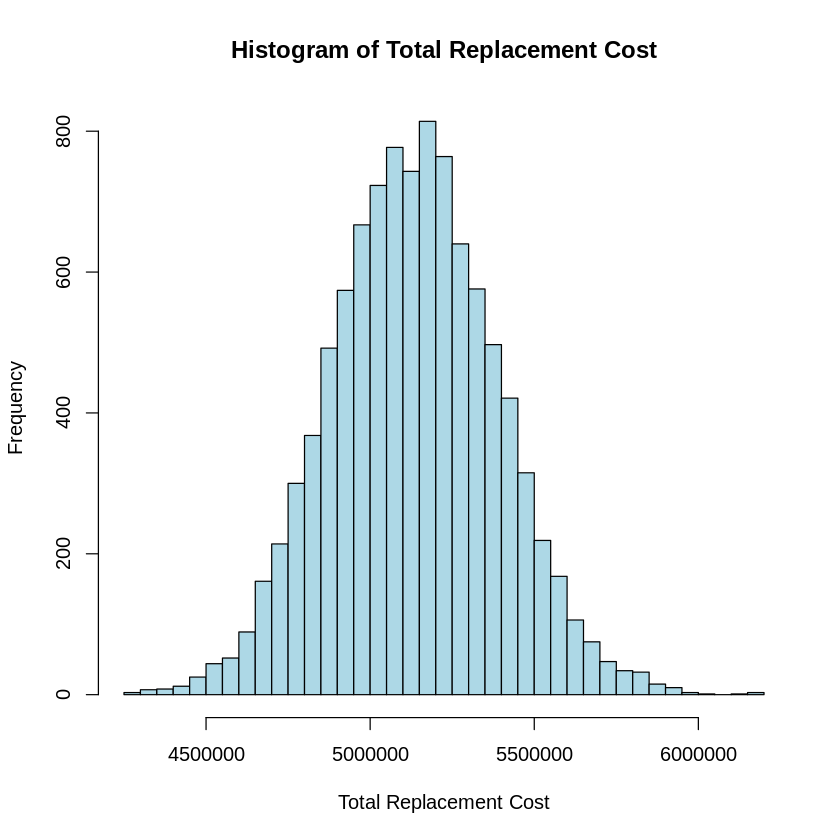

In [6]:
#Put solution to Exercise 4 in this cell. You may add additional cells if you like.
set.seed(123)

num_simulations <- 10000

#total costs
total_costs <- numeric(num_simulations)

# Repeating simulation
for (i in 1:num_simulations) {
  # Simulate time to failure for each bulb
  time_to_failure <- rweibull(num_bulbs_installed, shape = fit_weibull$estimate[1], scale = fit_weibull$estimate[2])
  
  # bulbs that fail
  failed_bulbs <- which(time_to_failure < 10)
  
  # cost for each failed bulb
  replacement_costs <- rgamma(length(failed_bulbs), shape = fit_gamma$estimate[1], scale = fit_gamma$estimate[2])
  
  # total cost
  total_costs[i] <- sum(replacement_costs)
}

# histogram
hist(total_costs, breaks = 30, main = "Histogram of Total Replacement Cost", xlab = "Total Replacement Cost", col = "lightblue", border = "black")

mean_total_cost <- mean(total_costs)
confidence_interval <- quantile(total_costs, c(0.025, 0.975))
probability_exceed_3500 <- mean(total_costs > 3500)

cat("a) Average expected total cost:", mean_total_cost, "\n")
cat("b) 95% Confidence Interval for total cost:", confidence_interval, "\n")
cat("c) Probability that total cost will exceed $3500:", probability_exceed_3500, "\n")


#### 4b. Report Your Results

Put your answers to the 3 prediction questions in this cell.

* What is the average expected total cost to replace all bulbs that fail within the initial 10-year period?

$5,133,452

* Give a 95% confidence interval for the expected total cost to replace all bulbs that fail during the initial 10 years?

between $4,653,950 and $5,631,631

* What is the probability that this total cost will exceed $3500?

1, 100%